### Importing Libraries
<a id='setup'></a>

In [1]:
# import packages to use
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

#### Data Wrangling

In [6]:
df = pd.read_csv('202110-baywheels-tripdata.csv')

In [7]:
df.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,7D43255A9D6F4DBA,classic_bike,2021-10-20 13:27:56,2021-10-20 13:34:37,San Fernando St at 4th St,SJ-M10-2,2nd St at Julian St,SJ-K10,37.335885,-121.885660,37.341132,-121.892844,member
1,286294003C3DFEA6,electric_bike,2021-10-15 13:16:01,2021-10-15 13:17:33,Jersey St at Castro St,SF-R19,Jersey St at Church St,SF-R20,37.750494,-122.433891,37.750882,-122.427622,member
2,5405832D8BD4D8E9,classic_bike,2021-10-13 12:12:46,2021-10-13 12:21:22,The Embarcadero at Sansome St,SF-A27,Montgomery St BART Station (Market St at 2nd St),SF-F28-2,37.804770,-122.403234,37.789620,-122.400808,member
3,2DE9700FA73E296A,classic_bike,2021-10-13 17:45:55,2021-10-13 18:02:31,Valencia St at 21st St,SF-P22,Folsom St at 5th St,SF-I27,37.756708,-122.421025,37.780738,-122.402728,member
4,DBA7CB5E699A0141,classic_bike,2021-10-18 15:09:26,2021-10-18 15:43:16,Russell St at College Ave,BK-H10,Telegraph Ave at Carleton St,BK-F9,37.858473,-122.253253,37.862320,-122.258801,casual


    from above, our dataset has 13 columns

In [8]:
# check the size of our dataset
df.shape

(222570, 13)

Our dataset has 13 columns and 222570 rows

In [13]:
# column names
list(df.columns)

['ride_id',
 'rideable_type',
 'started_at',
 'ended_at',
 'start_station_name',
 'start_station_id',
 'end_station_name',
 'end_station_id',
 'start_lat',
 'start_lng',
 'end_lat',
 'end_lng',
 'member_casual']


The dataset has 13 columns which are listed below<br>
rideid(object):Represent number of bike<br>
rideable_type(object): type of bike<br>
started_at(object): start date and time of ride<br>
start station_name(object): name of start station<br>
start_station_id(object): representation of start station<br>
end_station_name(object): name of end station<br>
end_station_id(object): Representation of station in the dataset<br>
start_lat(float64): start latitude of ride<br>
start_lng(float64): start longitude of ride<br>
end_lat(float64): end latitude of ride<br>
end_lng(float64): logitude of end_station<br>
member casual(object): type of membership<br>

In [16]:
# check data types of different columns in the dataset
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

#### Unique Elements

In [18]:
df.nunique()

ride_id               222570
rideable_type              3
started_at            207205
ended_at              206931
start_station_name       467
start_station_id         467
end_station_name         466
end_station_id           466
start_lat              74043
start_lng              77491
end_lat                74663
end_lng                78070
member_casual              2
dtype: int64

In [20]:
# summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222570 entries, 0 to 222569
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             222570 non-null  object 
 1   rideable_type       222570 non-null  object 
 2   started_at          222570 non-null  object 
 3   ended_at            222570 non-null  object 
 4   start_station_name  177656 non-null  object 
 5   start_station_id    177656 non-null  object 
 6   end_station_name    172832 non-null  object 
 7   end_station_id      172832 non-null  object 
 8   start_lat           222570 non-null  float64
 9   start_lng           222570 non-null  float64
 10  end_lat             222086 non-null  float64
 11  end_lng             222086 non-null  float64
 12  member_casual       222570 non-null  object 
dtypes: float64(4), object(9)
memory usage: 22.1+ MB


In [22]:
# statistics of the columns of float type
df.describe()

,start_lat,start_lng,end_lat,end_lng
count,222570.000000,222570.000000,222086.000000,222086.000000
mean,37.756389,-122.381636,37.756537,-122.381477
std,0.103832,0.126024,0.103790,0.125844
min,37.260000,-122.511280,37.260000,-122.539020
25%,37.765319,-122.429800,37.765278,-122.429029
50%,37.776598,-122.411872,37.776609,-122.411622
75%,37.789655,-122.395292,37.790000,-122.395282
max,37.880222,-121.810000,37.880222,-121.770000


#### Missing values

In [23]:
# check for missing values
df.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    44914
start_station_id      44914
end_station_name      49738
end_station_id        49738
start_lat                 0
start_lng                 0
end_lat                 484
end_lng                 484
member_casual             0
dtype: int64

In [26]:
# drop start_station_name and id and endstation_name and id
df1 = df.dropna()

since we cannot retrieve the missing values and those values are insignificant compared to the large sample size so we can remove/drop them from the dataset 

In [27]:
# check the shape again
df1.shape

(152187, 13)

After dropping the cells with missing values, the number of rows drops to 152187

In [25]:
# recheck the missing values
df1.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

In [28]:
# recheck the statistics
df1.describe()

,start_lat,start_lng,end_lat,end_lng
count,152187.000000,152187.000000,152187.000000,152187.000000
mean,37.766078,-122.383831,37.766209,-122.383586
std,0.087137,0.107265,0.087145,0.107158
min,37.309001,-122.511280,37.308950,-122.539020
25%,37.766594,-122.426119,37.766593,-122.423883
50%,37.776619,-122.410856,37.776620,-122.410122
75%,37.788765,-122.394586,37.789354,-122.394586
max,37.880222,-121.863615,37.880222,-121.863613


When we compare the statistics before and after dropping values, there is no significant change in the mean, min and max. 
Though there is a slight change in the std(standard deviation), changing in all the columns.
The count also drops by a bigger margin

#### Duplicates

In [30]:
# duplicate rows
df1.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
217708    False
220578    False
221962    False
222114    False
222217    False
Length: 152187, dtype: bool

In [31]:
sum(df1.duplicated())

0

Clearly, there are no duplicate values in our data

## Data Cleaning

In [118]:
df1.columns

Index(['rideable_type', 'started_at', 'ended_at', 'start_station_name',
       'end_station_name', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [ ]:
df1 = df1.drop(columns=['ride_id', 'start_station_id','end_station_id'])

In [119]:
df1.columns

Index(['rideable_type', 'started_at', 'ended_at', 'start_station_name',
       'end_station_name', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

i have deleted the following columns `["ride_id", "start_station_id", "end_station_id"]` because i don't think i will need them in my analysis

## Exploratory data Analysis

### Research Question 1: Which station is busiest in terms of where most rides begun and ended. Which bikes are most taken.

In [33]:
# station where most rides started the journey
df1['start_station_name'].value_counts()

Market St at 10th St                              2293
Powell St BART Station (Market St at 4th St)      1741
Powell St BART Station (Market St at 5th St)      1662
Market St at Steuart St                           1600
San Francisco Caltrain (Townsend St at 4th St)    1466
                                                  ... 
SF Depot-2 (Minnesota St Outbound)                   3
Foothill Blvd at Harrington Ave                      2
Minnesota St Depot                                   2
Bond St at High St                                   2
26th Ave at International Blvd                       1
Name: start_station_name, Length: 466, dtype: int64

In [34]:
# station where most rides ended the journey
df1['end_station_name'].value_counts()

Market St at 10th St                            2211
Powell St BART Station (Market St at 4th St)    1924
Powell St BART Station (Market St at 5th St)    1740
Market St at Steuart St                         1668
17th St at Valencia St                          1625
                                                ... 
San Antonio Park                                   5
Bond St at High St                                 3
Minnesota St Depot                                 3
26th Ave at International Blvd                     1
SF Depot-2 (Minnesota St Outbound)                 1
Name: end_station_name, Length: 466, dtype: int64

From the above cells, Market St at 10th St stands out as the station where most rides started and where most rides ended

#### Bikes

In [45]:
df1['rideable_type'].value_counts()

classic_bike     76415
electric_bike    74174
docked_bike       1598
Name: rideable_type, dtype: int64

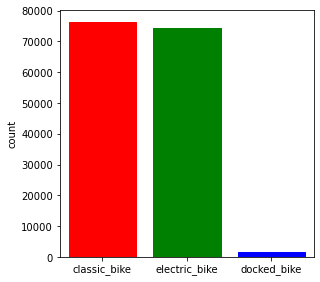

In [48]:
labelcount = df1['rideable_type'].value_counts()

plt.figure(figsize=(10, 10))
plt.subplot(221)
ax = sns.barplot(x=labelcount.index, y=labelcount.values)
ax.set_ylabel('count')
ax.patches[0].set_color('red')
ax.patches[1].set_color('green')
ax.patches[2].set_color('blue')

From the plot, the number of classic and electic bikes are way higher than the docked bikes

### Research Question 2: What is the distribution of stations in the locality.

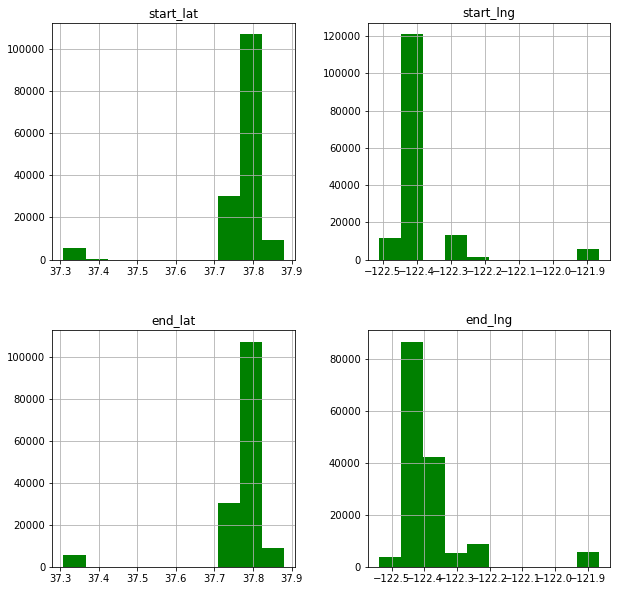

In [50]:
df1.hist(figsize=(10,10), color='green');

One of the interesting outcomes from the graph is that <strong>"the majority of the stations are in close proximity ( in the same area) with only few stations in far places"

### Research Question 3: What is the relationship between bikes, membership (member/casual) and the start stations.

In [52]:
# drop columns that won't be used on the analysis
df1 = df1.drop(columns=['ride_id','start_station_id','end_station_id'])

In [58]:
df1['member_casual'].value_counts()

member    81783
casual    70404
Name: member_casual, dtype: int64

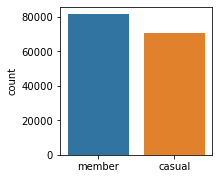

In [99]:
member = df1['member_casual'].value_counts()
plt.figure(figsize=(6, 6))
plt.subplot(221)
ax = sns.barplot(x=member.index, y=member.values);
ax.set_ylabel("count");

#### What is the count of electric bikes that are members or casual

member    39346
casual    34828
Name: member_casual, dtype: int64


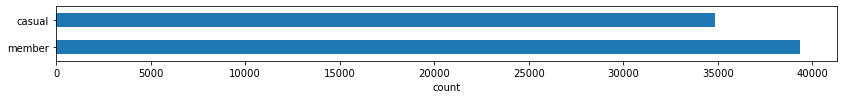

In [56]:
electric = df1[df1['rideable_type']=='electric_bike']
ele_count = electric['member_casual'].value_counts()
ele_count.plot(x='genres', kind='barh', figsize=(14, 1))
plt.xlabel('count')
print(ele_count)

#### What is the count of classic bikes that are members or casual

member    42437
casual    33978
Name: member_casual, dtype: int64


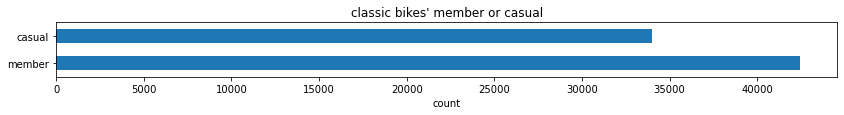

In [57]:
classic = df1[df1['rideable_type']=='classic_bike']
classic_count = classic['member_casual'].value_counts()
classic_count.plot(x='genres', kind='barh', figsize=(14, 1), title="classic bikes' member or casual")
plt.xlabel('count')
print(classic_count)

#### What is the count of docked bikes that are members or casual

casual    1598
Name: member_casual, dtype: int64


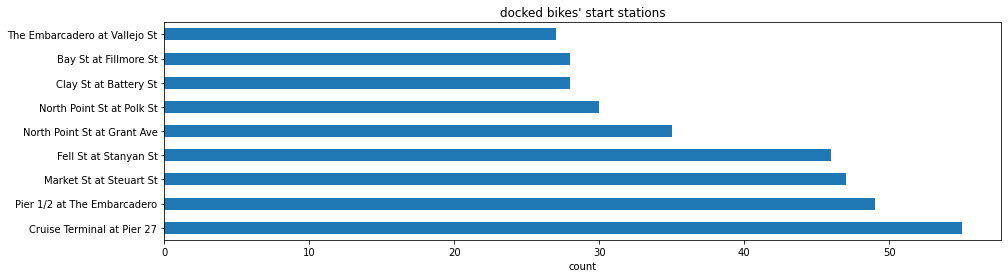

In [100]:
docked = df1[df1['rideable_type']=='docked_bike']
print(docked['member_casual'].value_counts())
dock_count = docked['start_station_name'].value_counts().head(9)
dock_count.plot(x='count', kind='barh', figsize=(15, 4), title="docked bikes' start stations")
plt.xlabel('count');

from the above analysis, interesting outcomes can be got:
+ all docked bikes are/belong to casual
+ most docked bikes start at Cruise Terminal

### Research Question 4:  How busy are the week days in relation to where the rides started. Which hour of the day seems most occupied.

In [73]:
# extract started_at columns
dftime = df1[['started_at']]
dftime

,started_at
0,2021-10-20 13:27:56
1,2021-10-15 13:16:01
2,2021-10-13 12:12:46
3,2021-10-13 17:45:55
4,2021-10-18 15:09:26
...,...
217708,2021-10-24 21:13:27
220578,2021-10-05 14:24:36
221962,2021-10-20 14:47:34
222114,2021-10-22 17:05:59


In [74]:
# convert "started_at" column from object type to datetime type column
time_column = 'started_at'
dftime[time_column] = pd.to_datetime(dftime[time_column])

Above::   converted "started_at" column to datetime type column

In [75]:
# get the week day
dftime['Weekday'] = dftime['started_at'].dt.weekday

In [77]:
dftime

,started_at,Weekday
0,2021-10-20 13:27:56,2
1,2021-10-15 13:16:01,4
2,2021-10-13 12:12:46,2
3,2021-10-13 17:45:55,2
4,2021-10-18 15:09:26,0
...,...,...
217708,2021-10-24 21:13:27,6
220578,2021-10-05 14:24:36,1
221962,2021-10-20 14:47:34,2
222114,2021-10-22 17:05:59,4


In [106]:
count = dftime['Weekday'].value_counts()
count

4    29357
5    29272
6    20762
3    20037
1    18647
2    17588
0    16524
Name: Weekday, dtype: int64

##### WeekDay plot

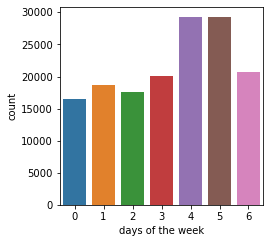

In [108]:
plt.figure(figsize=(8, 8))
plt.subplot(221)
ax = sns.barplot(x=count.index, y=count.values)
ax.set_xlabel('days of the week')
ax.set_ylabel('count');

Majority of the trips are taken on Thursday(4) and Friday(5).

##### Hour plot

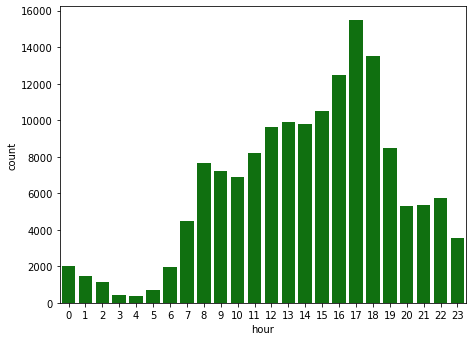

In [109]:
dftime['Hour'] = dftime['started_at'].dt.hour

count_ = dftime['Hour'].value_counts()
plt.figure(figsize=(16, 12))
plt.subplot(221)
ax = sns.barplot(x=count_.index, y=count_.values, color='g')
ax.set_xlabel('hour')
ax.set_ylabel('count');

It is clear from the above plot that the peaks are observed at 5PM & 6PM implying that majority of the rides are taken in the afternoons while the least trips occur between midnight and 6 in the morning

In [90]:
dftime.head(5)

,started_at,Weekday,Hour
0,2021-10-20 13:27:56,2,13
1,2021-10-15 13:16:01,4,13
2,2021-10-13 12:12:46,2,12
3,2021-10-13 17:45:55,2,17
4,2021-10-18 15:09:26,0,15


## Correlations between features of the data

Are there relations between features like weekday, hour, latitude and logitude 

In [92]:
df2 = df1[['started_at','ended_at','start_lat','start_lng','end_lat','end_lng']]

df2['started_at'] = pd.to_datetime(df2['started_at'])
df2['ended_at'] = pd.to_datetime(df2['ended_at'])
df2['start_day'] = df2['started_at'].dt.weekday
df2['start_hour'] = df2['started_at'].dt.hour
df2['end_day'] = df2['ended_at'].dt.weekday
df2['end_hour'] = df2['ended_at'].dt.hour

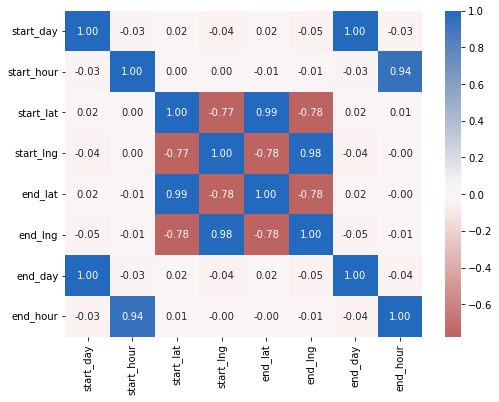

In [96]:
# pairwise correlation between features
features = ['start_day','start_hour','start_lat','start_lng','end_lat','end_lng','end_day','end_hour']

# correlation plot
plt.figure(figsize=[8,6])
sns.heatmap(df2[features].corr(), annot=True, fmt='.2f',cmap='vlag_r', center=0 )
plt.show()

The correlation coefficients indicate that start day and end day have very weak positive and negative 
correlations with the pairs of variables: start lat, end lat, start lng, end lng.

There is a high correlation between start hour and end hour implying a stronger relationship. This can
further imply that most trips didn't exceed an hour.

##### We can further investigate the relationship between start and end hour

<Figure size 576x576 with 0 Axes>

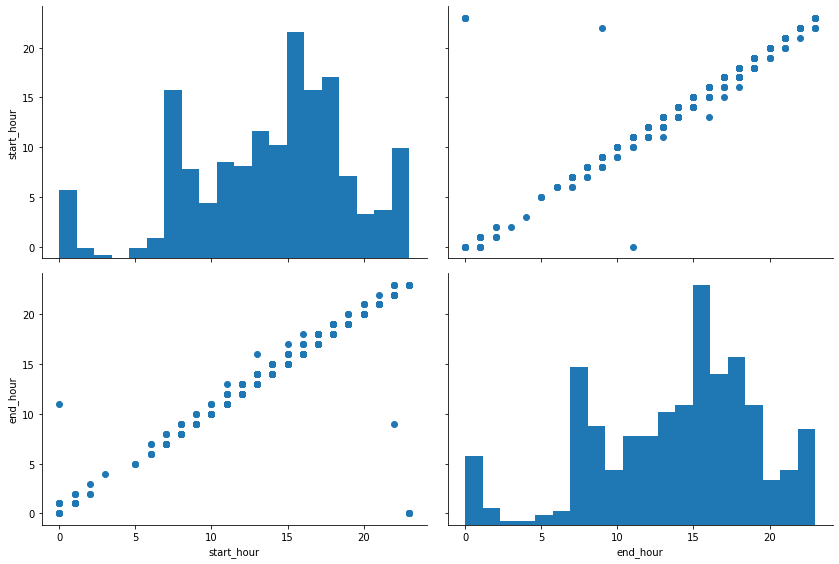

In [97]:
# plot matrix: sample 500 records so that plots are clearer and they render faster
key_features = ['start_hour','end_hour']
df2_sample = df2.sample(500, replace=False)
plt.figure(figsize=[8,8])
p = sns.PairGrid(data=df2_sample, vars = key_features, size=4, aspect=1.5)
p.map_offdiag(plt.scatter)
p.map_diag(plt.hist, bins=20)
plt.show()

This can further signify that almost all trips did not exceed an hour's ride

## Conclusions

1. Data wrangling

The dataset had 222570 rows and 13 columns, but I don't think I needed all of them for my analysis. I had some missing values which I deleted. I had to visualize the statistics summary of my data, and I got a better idea of the questions I could ask myself.

I then asked myself these questions after Data Wrangling
+ Which station is busiest in terms of where most rides begun and ended. Which bikes are most taken.
+ What is the distribution of stations in the locality.
+ What is the relationship between bikes, membership (member/casual) and the start stations.
+ How busy are the week days in relation to where the rides started. Which hour of the day seems most occupied.

2. Data Cleaning

I deleted the columns that i thought weren't necessary for my analysis like ride_id , start_station_id and end_station_id. The data was 10 columns and 152187 rows.


3. EDA

The process of EDA was to help me answer the questions I asked myself after data wrangling. 

I took mainly the following steps while answering my questions.
+ extract relevant information to answer my questions.
+ Visualize how my target attribute behaves concerning other features.

Following are some insights extracted after analysis.
#### Research Question 2: What is the distribution of stations in the locality.
+ One of the interesting outcomes is that the majority of the stations are in close proximity since they lie within the same latitude and logitude, with only few stations in far places


#### Research Question 4: How busy are the week days in relation to where the rides started. Which hour of the day seems most occupied.
+ Majority of the trips are taken on Thursday(4) and Friday(5).
+ Majority of the rides are taken in the afternoons around 5pm and 6pm while the least trips occur between midnight and 6 in the morning
